<a href="https://colab.research.google.com/github/jonitorta/Ejercicios_Machine_learning./blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Main libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Define paths
train_path = "train.csv"
test_path = "test.csv"

In [3]:
#Check data
data = pd.read_csv(train_path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#We have a lot of null in cabin, some in age and just 2 in embarked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


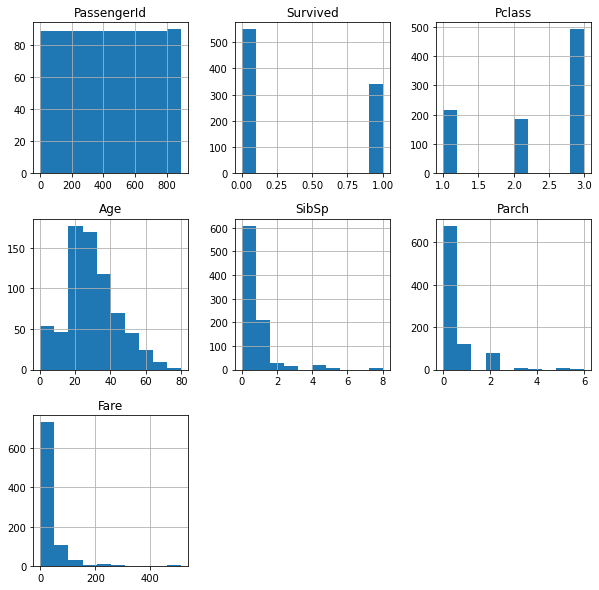

In [7]:
data.hist(figsize = (10, 10))
plt.show()

In [8]:
male_counts = data["Sex"].value_counts().iloc[0]
fmale_count = data["Sex"].value_counts().iloc[1]

In [9]:
total_sur = data[["Sex","Survived"]].groupby("Sex").sum()
male_sur_rate = total_sur.loc["male"][0]/male_counts
fmale_sur_rate = total_sur.loc["female"][0] /fmale_count

Male survival rate is 0.19 
Female survival rate is 0.74


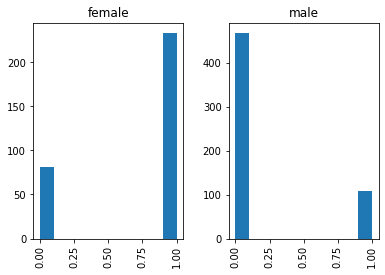

In [10]:
#As we can see male or female seems important to predict survival
print(f"Male survival rate is {round(male_sur_rate,2)} \nFemale survival rate is {round(fmale_sur_rate,2)}")
data["Survived"].hist(by = data["Sex"])
plt.show()

In [11]:
#Seems strange to me that pclass is negative corr and Fare is positive because fare determines pclass 
data_corr = data.corr()
data_corr["Survived"].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [14]:
#Create category for age interval
data["Age_interval"]  = pd.cut(data["Age"],
                                 bins = np.linspace(0.0,100,5),
                                 labels =  np.arange(1,5) )

In [16]:
#Most people is is 0-20 or 20-40
data["Age_interval"].value_counts()

2    349
1    301
3     63
4      1
Name: Age_interval, dtype: int64

In [17]:
#Drop column created above
data.drop("Age_interval", axis = 1, inplace=True)

In [18]:
#Separe labels from data
data_labels = data["Survived"]
data = data.drop("Survived", axis = 1 )

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttrAdder(BaseEstimator, TransformerMixin):
  #Add age intervals and binary sex
  #:arg: cat_ages if True add 5 age intervals from 0 to 100 in steps of 100 and delete age column
  #:arg: binary_sex if True add a column "Bin_sex" it's values are 0 if male and 1 if female
  #:return: return a np.array with the transformations  
  def __init__(self,cat_ages = False, binary_sex = False):
    self.cat_ages = cat_ages
    self.binary_sex = binary_sex
    

  def fit(self, X, y = None):
    return self

  def transform(self, X, y = None):
    if self.cat_ages: 
      X["Age_interval"]  = pd.cut(X["Age"],
                                 bins = np.linspace(0.0,100,5),
                                 labels =  np.arange(1,5) )
 
      X.drop("Age", axis = 1, inplace = True)

    if self.binary_sex :
      X["Bin_sex"] = X["Sex"][np.where(X["Sex"]=="male",0,1 )].index

      X.drop("Sex", axis = 1, inplace = True)

       
    return X

In [24]:
class ColumnThrower(BaseEstimator, TransformerMixin):
  #Throw columns
  #:args: throw_(insert_column) : if true throw that column
  #:return: a np.array without the especified columns.

  def __init__(self, throw_tikets = True, throw_names = True, throw_embarked = True, throw_cabin = True):
    self.throw_tikets = throw_tikets
    self.throw_names = throw_names
    self.throw_embarked = throw_embarked
    self.throw_cabin = throw_cabin
  
  def fit(self, X, y = None):
    return self

  def transform(self, X, y = None):
    if self.throw_names :
      X.drop("Name", axis = 1, inplace = True)
    
    if self.throw_tikets:
      X.drop("Ticket", axis = 1, inplace = True)
    
    if self.throw_embarked:
      X.drop("Embarked", axis = 1, inplace = True)

    if self.throw_cabin: 
      X.drop("Cabin", axis = 1, inplace = True)

    return X

In [25]:
#Just 2 people do not have an embarked register and i think it's not an important feature so i will fill those null with a random embarked value
data["Embarked"].fillna(value = data["Embarked"][0], inplace = True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [28]:
#import tools for data transformation and cleaning
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [29]:
num_pipeline = Pipeline ([
      ("imputer", SimpleImputer(strategy="median")), #Change numerical null attributes to median
       ("std_scaler", StandardScaler())           #Normalize data 
])

In [30]:
#Here i don't add age because i will drop it but i think there might be a better solution
num_attr = ["PassengerId", "Pclass", "SibSp", "Parch", "Fare"]

In [31]:
#Create a list for names of categorical attributes
cat_attr =list(data.columns)
for element in num_attr:
  cat_attr.remove(element)
cat_attr


['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked']

In [33]:
#create a pipeline for categorical attributes
cat_pipeline = Pipeline([
            ("attribs_adder", AttrAdder(cat_ages=True, binary_sex=True )), #Here we throw age and sex and replace them
            ("column_thrower", ColumnThrower(throw_names= True, throw_tikets= True) ) #Throw some columns 
])

In [34]:
#Create full transformation
full_pipeline = ColumnTransformer([
      ("cat", cat_pipeline, cat_attr ),        
      ("num", num_pipeline, num_attr)
])

In [35]:
#Transform data
prepared_data = full_pipeline.fit_transform(data)

In [36]:
#See transformed data
pd.DataFrame(prepared_data).head()

,0,1,2,3,4,5,6
0,1.0,0.0,-1.730108,0.827377,0.432793,-0.473674,-0.502445
1,2.0,1.0,-1.726220,-1.566107,0.432793,-0.473674,0.786845
2,2.0,1.0,-1.722332,0.827377,-0.474545,-0.473674,-0.488854
3,2.0,1.0,-1.718444,-1.566107,0.432793,-0.473674,0.420730
4,2.0,0.0,-1.714556,0.827377,-0.474545,-0.473674,-0.486337


In [37]:
#Create and train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
forest_reg = RandomForestClassifier()
forest_reg.fit(prepared_data,data_labels)
data_predictions = forest_reg.predict(prepared_data)

In [38]:
#Check model with a quick cross val segment in 3 groups not much data
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(forest_reg, prepared_data, data_labels, cv=3)

In [39]:
#Lets see how model is performing
from sklearn.metrics import confusion_matrix
cnf_mtx = confusion_matrix(data_labels, predictions)

In [40]:
def plot_conf_mtx(cf_matrix):
  #Plot a confusion matrix
  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()


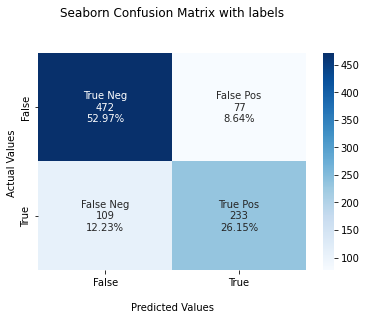

In [42]:
#Model looks ok
from seaborn import heatmap
plot_conf_mtx(cnf_mtx)